In [1]:
import os
import numpy as np
import pandas as pd
import torch
import pymatgen as mg
import seaborn as sns

import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from crabnet.kingcrab import CrabNet
from crabnet.model import Model
from utils.get_compute_device import get_compute_device

import train_crabnet as tcb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

In [2]:
compute_device = get_compute_device(prefer_last=True)
RNG_SEED = 42
torch.manual_seed(RNG_SEED)
np.random.seed(RNG_SEED)

## 715组HEC，不含非等比四元碳化物

In [3]:
### 715组数据不含非等比四元碳化物
df_modulus = pd.read_csv('/home/zhaoxi/Data/modulus.csv', index_col=0)

In [4]:
df_modulus = df_modulus.drop("structure",axis =1) 

In [5]:
df_modulus 

,formula,calc_modulus
0,Hf1 Cr3 C4,389.372
1,Cr3 Mo1 C4,415.446
2,Hf1 Cr2 Mo1 C4,405.053
3,Ta1 Cr1 Si2 C4,409.741
4,Ti1 Cr1 Si2 C4,434.640
...,...,...
710,Hf1 Zr1 Ti1 Mo1 C4,447.043
711,Hf1 Zr1 Ti1 W1 C4,466.460
712,Hf1 Zr1 Ti1 Cr1 C4,399.981
713,Hf1 Zr1 Ti1 Si1 C4,363.029


In [6]:
### 划分训练集
x_train,x_trainval = train_test_split(df_modulus, test_size=0.1, random_state=1)

In [7]:
x_train.columns = ["formula","target"]
x_trainval.columns = ["formula","target"]

In [8]:
x_train.to_csv('/home/zhaoxi/Software/CrabNet_Co/CoCoCrab-main/data/materials_data/elastic_modulus/715/train.csv')
x_trainval.to_csv(('/home/zhaoxi/Software/CrabNet_Co/CoCoCrab-main/data/materials_data/elastic_modulus/715/val.csv'))


Model architecture: out_dims, d_model, N, heads
3, 512, 3, 4
Running on compute device: cpu
Model size: 11987206 parameters



Generating EDM: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 643/643 [00:00<00:00, 216970.03formulae/s]


training with batchsize 128 (2**7.000)


Generating EDM: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 72/72 [00:00<00:00, 140787.83formulae/s]

stepping every 60 training passes, cycling lr every 10 epochs
checkin at 20 epochs to match lr scheduler
############################## 

x shape is torch.Size([128, 5]) 

x example: tensor([0.5004, 0.2441, 0.1280, 0.1275, 0.0000]) 

out shape is: torch.Size([128, 5, 256]) 

##############################
############################## 

x shape is torch.Size([128, 5]) 

x example: tensor([0.5004, 0.2441, 0.1280, 0.1275, 0.0000]) 

out shape is: torch.Size([128, 5, 256]) 

##############################


############################## 

x shape is torch.Size([128, 5]) 

x example: tensor([0.4968, 0.2557, 0.1249, 0.1226, 0.0000]) 

out shape is: torch.Size([128, 5, 256]) 

##############################
############################## 

x shape is torch.Size([128, 5]) 

x example: tensor([0.4968, 0.2557, 0.1249, 0.1226, 0.0000]) 

out shape is: torch.Size([128, 5, 256]) 

##############################
############################## 

x shape is torch.Size([128, 5]) 

x example: tensor([0.4967, 0.1239, 0.1266, 0.1237, 0.1292]) 

out shape is: torch.Size([128, 5, 256]) 

##############################
############################## 

x shape is torch.Size([128, 5]) 

x example: tensor([0.4967, 0.1239, 0.1266, 0.1237, 0.1292]) 

out shape is: torch.Size([128, 5, 256]) 

##############################
############################## 

x shape is torch.Size([128, 5]) 

x example: tensor([0.4978, 0.1282, 0.1235, 0.1262, 0.1243]) 

out shape is: torch.Size([128, 5, 256]) 

#####################

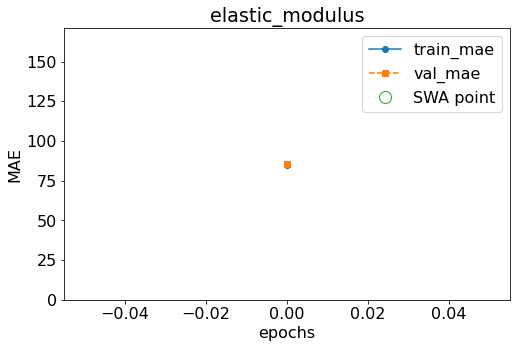

############################## 

x shape is torch.Size([128, 5]) 

x example: tensor([0.5038, 0.1244, 0.1248, 0.1213, 0.1257]) 

out shape is: torch.Size([128, 5, 256]) 

##############################
############################## 

x shape is torch.Size([128, 5]) 

x example: tensor([0.5038, 0.1244, 0.1248, 0.1213, 0.1257]) 

out shape is: torch.Size([128, 5, 256]) 

##############################
############################## 

x shape is torch.Size([128, 5]) 

x example: tensor([0.5007, 0.2531, 0.1233, 0.1229, 0.0000]) 

out shape is: torch.Size([128, 5, 256]) 

##############################
############################## 

x shape is torch.Size([128, 5]) 

x example: tensor([0.5007, 0.2531, 0.1233, 0.1229, 0.0000]) 

out shape is: torch.Size([128, 5, 256]) 

##############################
############################## 

x shape is torch.Size([128, 5]) 

x example: tensor([0.5071, 0.2489, 0.1241, 0.1199, 0.0000]) 

out shape is: torch.Size([128, 5, 256]) 

#####################

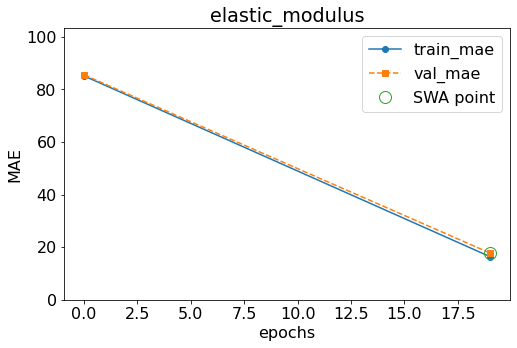

############################## 

x shape is torch.Size([128, 5]) 

x example: tensor([0.4941, 0.2532, 0.1262, 0.1265, 0.0000]) 

out shape is: torch.Size([128, 5, 256]) 

##############################
############################## 

x shape is torch.Size([128, 5]) 

x example: tensor([0.4941, 0.2532, 0.1262, 0.1265, 0.0000]) 

out shape is: torch.Size([128, 5, 256]) 

##############################
############################## 

x shape is torch.Size([128, 5]) 

x example: tensor([0.4980, 0.2542, 0.1215, 0.1263, 0.0000]) 

out shape is: torch.Size([128, 5, 256]) 

##############################
############################## 

x shape is torch.Size([128, 5]) 

x example: tensor([0.4980, 0.2542, 0.1215, 0.1263, 0.0000]) 

out shape is: torch.Size([128, 5, 256]) 

##############################
############################## 

x shape is torch.Size([128, 5]) 

x example: tensor([0.4966, 0.1306, 0.1276, 0.1207, 0.1244]) 

out shape is: torch.Size([128, 5, 256]) 

#####################

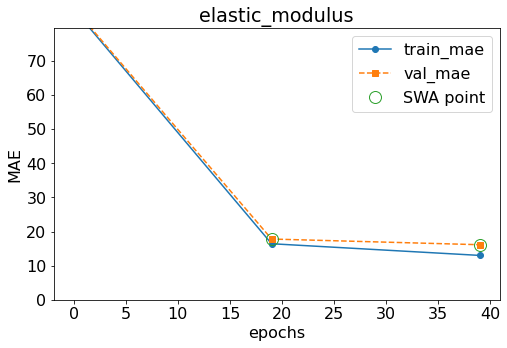

Saving network (elastic_modulus) to models/trained_models/elastic_modulus.pth


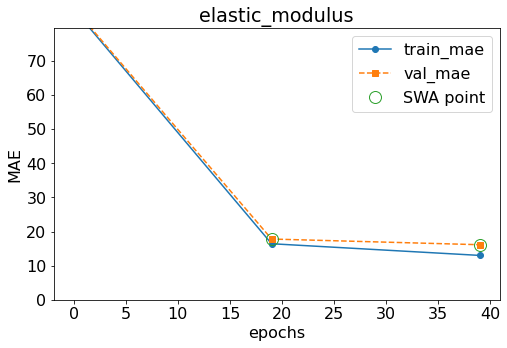

In [9]:
cb = tcb.get_model(data_dir='data/materials_data', mat_prop="elastic_modulus/715",transfer="elasticity0")

## 495种不含Si的四元等比碳化物

In [3]:
df_no_Si = pd.read_csv('/home/zhaoxi/Data/modulus_495.csv',index_col = 0)

In [4]:
df_no_Si = df_no_Si.drop("structure",axis = 1)
df_no_Si.rename(columns = {"calc_modulus":"target"},inplace = True)

In [5]:
df_no_Si

,formula,target
0,Hf1 Cr3 C4,389.372
1,Cr3 Mo1 C4,415.446
2,Hf1 Cr2 Mo1 C4,405.053
13,Hf1 Nb1 Cr2 C4,424.355
14,Ta3 Cr1 C4,497.590
...,...,...
708,Hf1 Zr1 Nb1 Cr1 C4,428.202
710,Hf1 Zr1 Ti1 Mo1 C4,447.043
711,Hf1 Zr1 Ti1 W1 C4,466.460
712,Hf1 Zr1 Ti1 Cr1 C4,399.981


In [6]:
x_train1,x_trainval1 = train_test_split(df_no_Si, test_size=0.1, random_state=1)

x_train1.to_csv('/home/zhaoxi/Software/CrabNet_Co/CoCoCrab-main/data/materials_data/elastic_modulus/young/train.csv')
x_trainval1.to_csv(('/home/zhaoxi/Software/CrabNet_Co/CoCoCrab-main/data/materials_data/elastic_modulus/young/val.csv'))


Model architecture: out_dims, d_model, N, heads
3, 512, 3, 4
Running on compute device: cpu
Model size: 11987206 parameters



Generating EDM: 100%|██████████████████████████████████████████████████████| 445/445 [00:00<00:00, 180788.97formulae/s]


training with batchsize 128 (2**7.000)


Generating EDM: 100%|████████████████████████████████████████████████████████| 50/50 [00:00<00:00, 136355.79formulae/s]

stepping every 20 training passes, cycling lr every 5 epochs
checkin at 10 epochs to match lr scheduler
############################## 

x shape is torch.Size([128, 5]) 

x example: tensor([0.5004, 0.2441, 0.1280, 0.1275, 0.0000]) 

out shape is: torch.Size([128, 5, 256]) 

##############################
############################## 

x shape is torch.Size([128, 5]) 

x example: tensor([0.5004, 0.2441, 0.1280, 0.1275, 0.0000]) 

out shape is: torch.Size([128, 5, 256]) 

##############################


############################## 

x shape is torch.Size([128, 5]) 

x example: tensor([0.4968, 0.2557, 0.1249, 0.1226, 0.0000]) 

out shape is: torch.Size([128, 5, 256]) 

##############################
############################## 

x shape is torch.Size([128, 5]) 

x example: tensor([0.4968, 0.2557, 0.1249, 0.1226, 0.0000]) 

out shape is: torch.Size([128, 5, 256]) 

##############################
############################## 

x shape is torch.Size([128, 5]) 

x example: tensor([0.4994, 0.2491, 0.1272, 0.1243, 0.0000]) 

out shape is: torch.Size([128, 5, 256]) 

##############################
############################## 

x shape is torch.Size([128, 5]) 

x example: tensor([0.4994, 0.2491, 0.1272, 0.1243, 0.0000]) 

out shape is: torch.Size([128, 5, 256]) 

##############################
############################## 

x shape is torch.Size([61, 5]) 

x example: tensor([0.4959, 0.2555, 0.1230, 0.1257, 0.0000]) 

out shape is: torch.Size([61, 5, 256]) 

#######################

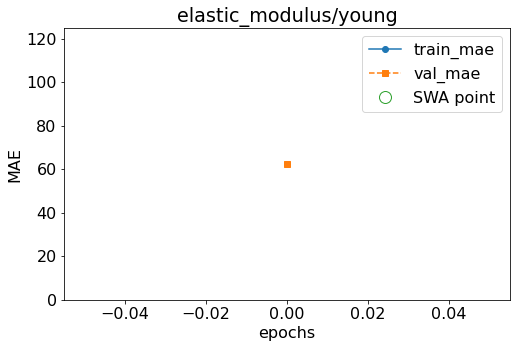

############################## 

x shape is torch.Size([128, 5]) 

x example: tensor([0.4967, 0.5033, 0.0000, 0.0000, 0.0000]) 

out shape is: torch.Size([128, 5, 256]) 

##############################
############################## 

x shape is torch.Size([128, 5]) 

x example: tensor([0.4967, 0.5033, 0.0000, 0.0000, 0.0000]) 

out shape is: torch.Size([128, 5, 256]) 

##############################
############################## 

x shape is torch.Size([128, 5]) 

x example: tensor([0.4939, 0.2521, 0.1246, 0.1294, 0.0000]) 

out shape is: torch.Size([128, 5, 256]) 

##############################
############################## 

x shape is torch.Size([128, 5]) 

x example: tensor([0.4939, 0.2521, 0.1246, 0.1294, 0.0000]) 

out shape is: torch.Size([128, 5, 256]) 

##############################
############################## 

x shape is torch.Size([128, 5]) 

x example: tensor([0.5002, 0.1265, 0.1245, 0.1253, 0.1234]) 

out shape is: torch.Size([128, 5, 256]) 

#####################

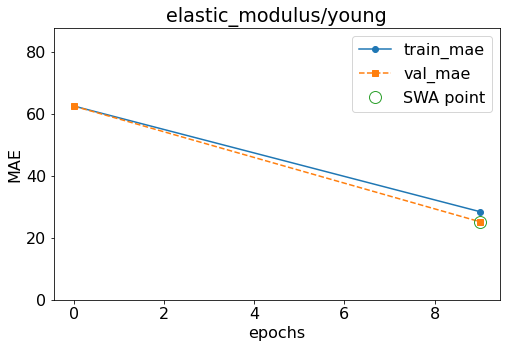

############################## 

x shape is torch.Size([128, 5]) 

x example: tensor([0.4982, 0.2553, 0.1228, 0.1237, 0.0000]) 

out shape is: torch.Size([128, 5, 256]) 

##############################
############################## 

x shape is torch.Size([128, 5]) 

x example: tensor([0.4982, 0.2553, 0.1228, 0.1237, 0.0000]) 

out shape is: torch.Size([128, 5, 256]) 

##############################
############################## 

x shape is torch.Size([128, 5]) 

x example: tensor([0.4964, 0.2500, 0.1249, 0.1287, 0.0000]) 

out shape is: torch.Size([128, 5, 256]) 

##############################
############################## 

x shape is torch.Size([128, 5]) 

x example: tensor([0.4964, 0.2500, 0.1249, 0.1287, 0.0000]) 

out shape is: torch.Size([128, 5, 256]) 

##############################
############################## 

x shape is torch.Size([128, 5]) 

x example: tensor([0.4948, 0.2488, 0.1284, 0.1280, 0.0000]) 

out shape is: torch.Size([128, 5, 256]) 

#####################

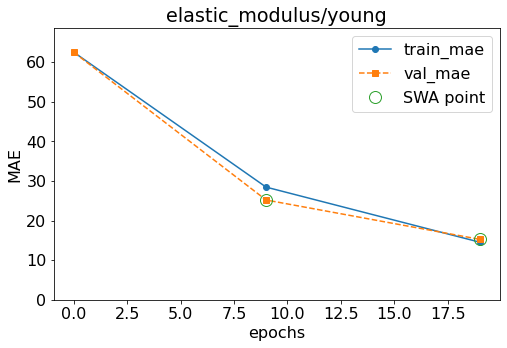

############################## 

x shape is torch.Size([128, 5]) 

x example: tensor([0.4994, 0.2541, 0.2465, 0.0000, 0.0000]) 

out shape is: torch.Size([128, 5, 256]) 

##############################
############################## 

x shape is torch.Size([128, 5]) 

x example: tensor([0.4994, 0.2541, 0.2465, 0.0000, 0.0000]) 

out shape is: torch.Size([128, 5, 256]) 

##############################
############################## 

x shape is torch.Size([128, 5]) 

x example: tensor([0.5076, 0.2424, 0.1253, 0.1246, 0.0000]) 

out shape is: torch.Size([128, 5, 256]) 

##############################
############################## 

x shape is torch.Size([128, 5]) 

x example: tensor([0.5076, 0.2424, 0.1253, 0.1246, 0.0000]) 

out shape is: torch.Size([128, 5, 256]) 

##############################
############################## 

x shape is torch.Size([128, 5]) 

x example: tensor([0.5061, 0.1235, 0.1216, 0.1243, 0.1245]) 

out shape is: torch.Size([128, 5, 256]) 

#####################

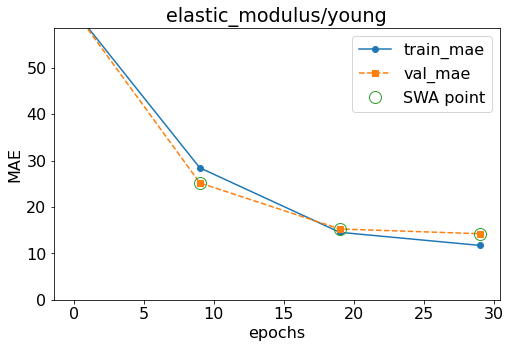

############################## 

x shape is torch.Size([128, 5]) 

x example: tensor([0.5045, 0.2492, 0.1260, 0.1202, 0.0000]) 

out shape is: torch.Size([128, 5, 256]) 

##############################
############################## 

x shape is torch.Size([128, 5]) 

x example: tensor([0.5045, 0.2492, 0.1260, 0.1202, 0.0000]) 

out shape is: torch.Size([128, 5, 256]) 

##############################
############################## 

x shape is torch.Size([128, 5]) 

x example: tensor([0.5056, 0.1213, 0.1240, 0.1244, 0.1247]) 

out shape is: torch.Size([128, 5, 256]) 

##############################
############################## 

x shape is torch.Size([128, 5]) 

x example: tensor([0.5056, 0.1213, 0.1240, 0.1244, 0.1247]) 

out shape is: torch.Size([128, 5, 256]) 

##############################
############################## 

x shape is torch.Size([128, 5]) 

x example: tensor([0.4888, 0.2563, 0.1263, 0.1286, 0.0000]) 

out shape is: torch.Size([128, 5, 256]) 

#####################

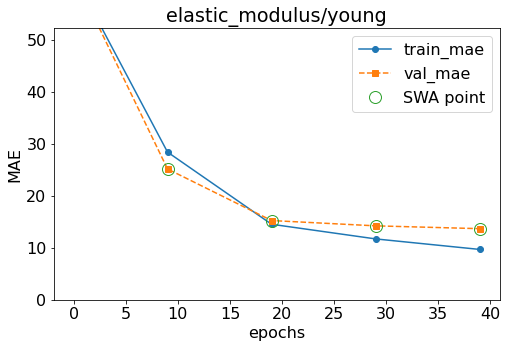

Saving network (elastic_modulus/young) to models/trained_models/elastic_modulus/young.pth


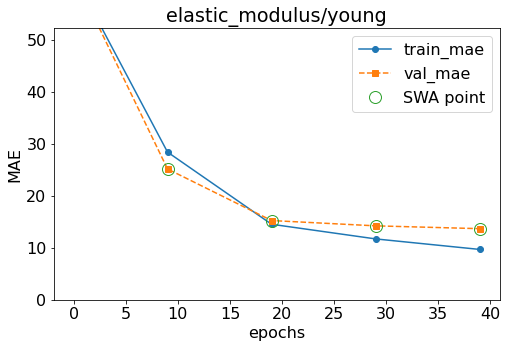

In [7]:
cb_young = tcb.get_model(data_dir='data/materials_data', mat_prop="elastic_modulus/young",transfer="elasticity0")

In [9]:
young_lc =pd.read_csv("/home/zhaoxi/Software/CrabNet_Co/CoCoCrab-main/figures/lc_data/elastic_modulus/young_lc.csv")

In [10]:
young_lc

,epoch,train loss,val loss,swa
0,0.0,62.489625,62.465071,n
1,9.0,28.447759,25.196904,y
2,19.0,14.549338,15.265189,y
3,29.0,11.726441,14.243656,y
4,39.0,9.701131,13.699719,y


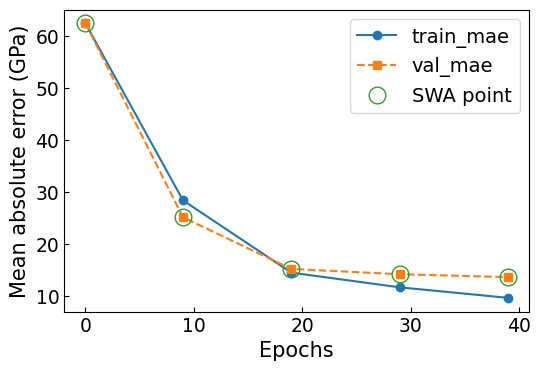

In [11]:
plt.figure(figsize=(6, 4),dpi=100)

plt.plot(young_lc['epoch'], young_lc['train loss'],
                             'o-', label='train_mae')
plt.plot(young_lc['epoch'], young_lc['val loss'],
                             's--', label='val_mae')

plt.plot(young_lc['epoch'], young_lc['val loss'],
                             'o', ms=12, mfc='none', label='SWA point')
#plt.text(0,10,"R = 0.847",fontsize = 13)

plt.tick_params(left='on',bottom='on',direction='in')

plt.legend(fontsize = 14)
#plt.title("Young's moludus losscurve",fontsize = 16)
plt.xticks(fontsize=13.5)
plt.yticks(fontsize=13.5)
plt.xlabel('Epochs',fontsize = 15)
plt.ylabel('Mean absolute error (GPa)',fontsize = 15)

plt.savefig('/mnt/e/ZHAO/Data/ELASTIC_HEC/Figure/Young_lc.png', dpi = 600, bbox_inches = 'tight')   ### 保存图片
plt.show()



In [12]:
data_train = rf'data/materials_data/elastic_modulus/young/train.csv'

In [13]:
cb_young.load_data(data_train, batch_size=2**9, train=False)

Generating EDM: 100%|███████████████████████████████████████████████████████| 445/445 [00:00<00:00, 90241.52formulae/s]


In [54]:
output_train_young = cb_young.predict(cb_young.data_loader)

src: tensor([[ 6., 23., 72., 40.,  0.],
        [ 6., 72., 22., 42., 74.],
        [ 6., 23., 72., 24.,  0.],
        ...,
        [ 6., 40., 73., 41., 42.],
        [ 6., 40., 41., 23.,  0.],
        [ 6., 72., 40.,  0.,  0.]])
frac: tensor([[0.5000, 0.2500, 0.1250, 0.1250, 0.0000],
        [0.5000, 0.1250, 0.1250, 0.1250, 0.1250],
        [0.5000, 0.2500, 0.1250, 0.1250, 0.0000],
        ...,
        [0.5000, 0.1250, 0.1250, 0.1250, 0.1250],
        [0.5000, 0.2500, 0.1250, 0.1250, 0.0000],
        [0.5000, 0.3750, 0.1250, 0.0000, 0.0000]])
############################## 

x shape is torch.Size([445, 5]) 

x example: tensor([0.5000, 0.2500, 0.1250, 0.1250, 0.0000]) 

out shape is: torch.Size([445, 5, 256]) 

##############################
############################## 

x shape is torch.Size([445, 5]) 

x example: tensor([0.5000, 0.2500, 0.1250, 0.1250, 0.0000]) 

out shape is: torch.Size([445, 5, 256]) 

##############################


In [56]:
df_young_train = pd.DataFrame(
    {'calc': output_train_young[0], 'pred': output_train_young[1], 'formula': output_train_young[2],'uncert':output_train_young[3]})

In [61]:
df_young_train.to_csv("data/materials_data/elastic_modulus/young/df_young_train.csv")

In [62]:
df_young_train

,calc,pred,formula,uncert
0,435.518005,433.350311,Hf1 Zr1 V2 C4,9.028763
1,479.929993,484.024506,Hf1 Ti1 Mo1 W1 C4,7.607544
2,442.565002,446.696533,Hf1 V2 Cr1 C4,9.307267
3,495.484985,491.628326,Ti1 V1 Cr1 W1 C4,9.195504
4,483.140015,480.416260,Ti1 V2 Cr1 C4,10.240745
...,...,...,...,...
440,484.957001,533.889099,Ta2 V2 C4,38.440933
441,488.265991,481.890533,Hf1 Ta1 Mo2 C4,13.596282
442,481.985992,477.881622,Zr1 Ta1 Nb1 Mo1 C4,10.691760
443,434.286987,433.850128,Zr2 Nb1 V1 C4,9.048431


Text(0, 0.5, "predict young's modulus(GPa)")

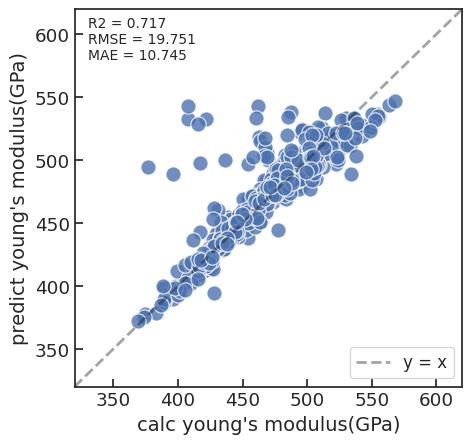

In [67]:
sns.set(style="ticks",font_scale=1.2)
plt.figure(figsize=(5,5),dpi=100)  ### 修改分辨率
axs = sns.scatterplot(data=df_young_train, x= "calc", y="pred",s=120,marker='o',alpha = 0.8, color = 'b')

formatXy = 'y = x'
axs.plot((0, 1), (0, 1), transform=axs.transAxes, linewidth=2, ls='--',c='k',alpha=0.4, label = formatXy)

act = np.array(output_train_young[0])
pred = np.array(output_train_young[1])
    
r2 = r2_score(act, pred)
mae = mean_absolute_error(act, pred)
rmse = np.sqrt(mean_squared_error(act, pred))

str = 'R = %.3f \nRMSE = %.3f \nMAE = %.3f '%(r2, rmse, mae)

axs.set_xlim(320,620)
axs.set_ylim(320,620)

axs.legend(loc = 'lower right', fontsize = 12)
axs.text(330,580,str,fontsize = 10)

plt.tick_params(left='on',bottom='on',direction='in')
plt.xlabel("calc young's modulus(GPa)", fontdict={'size': 14})
plt.ylabel("predict young's modulus(GPa)", fontdict={'size': 14})

In [3]:
df_bulk = pd.read_csv('/home/zhaoxi/Data/bulk.csv',index_col = 0)
df_shear = pd.read_csv('/home/zhaoxi/Data/shear.csv',index_col = 0)
df_hardness = pd.read_csv('/home/zhaoxi/Data/hardness.csv',index_col = 0)

In [4]:
df_bulk.rename(columns = {"bulk_modulus":"target"},inplace = True)
df_shear.rename(columns = {"shear_modulus":"target"},inplace = True)
df_hardness.rename(columns = {"hardness":"target"},inplace = True)

In [5]:
x_train_bulk,x_trainval_bulk = train_test_split(df_bulk, test_size=0.1, random_state=1)

x_train_bulk.to_csv('/home/zhaoxi/Software/CrabNet_Co/CoCoCrab-main/data/materials_data/elastic_modulus/bulk/train.csv')
x_trainval_bulk.to_csv(('/home/zhaoxi/Software/CrabNet_Co/CoCoCrab-main/data/materials_data/elastic_modulus/bulk/val.csv'))


Model architecture: out_dims, d_model, N, heads
3, 512, 3, 4
Running on compute device: cpu
Model size: 11987206 parameters



Generating EDM: 100%|███████████████████████████████████████████████████████| 445/445 [00:00<00:00, 192260.54formulae/s]


training with batchsize 128 (2**7.000)


Generating EDM: 100%|█████████████████████████████████████████████████████████| 50/50 [00:00<00:00, 176527.95formulae/s]

stepping every 40 training passes, cycling lr every 10 epochs
checkin at 20 epochs to match lr scheduler
############################## 

x shape is torch.Size([128, 5]) 

x example: tensor([0.5004, 0.2441, 0.1280, 0.1275, 0.0000]) 

out shape is: torch.Size([128, 5, 256]) 

##############################
############################## 

x shape is torch.Size([128, 5]) 

x example: tensor([0.5004, 0.2441, 0.1280, 0.1275, 0.0000]) 

out shape is: torch.Size([128, 5, 256]) 

##############################


############################## 

x shape is torch.Size([128, 5]) 

x example: tensor([0.4968, 0.2557, 0.1249, 0.1226, 0.0000]) 

out shape is: torch.Size([128, 5, 256]) 

##############################
############################## 

x shape is torch.Size([128, 5]) 

x example: tensor([0.4968, 0.2557, 0.1249, 0.1226, 0.0000]) 

out shape is: torch.Size([128, 5, 256]) 

##############################
############################## 

x shape is torch.Size([128, 5]) 

x example: tensor([0.4994, 0.2491, 0.1272, 0.1243, 0.0000]) 

out shape is: torch.Size([128, 5, 256]) 

##############################
############################## 

x shape is torch.Size([128, 5]) 

x example: tensor([0.4994, 0.2491, 0.1272, 0.1243, 0.0000]) 

out shape is: torch.Size([128, 5, 256]) 

##############################
############################## 

x shape is torch.Size([61, 5]) 

x example: tensor([0.4959, 0.2555, 0.1230, 0.1257, 0.0000]) 

out shape is: torch.Size([61, 5, 256]) 

#######################

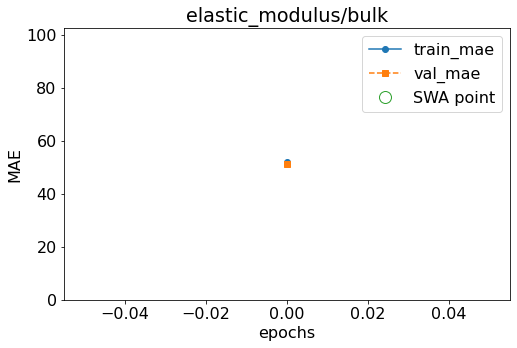

############################## 

x shape is torch.Size([128, 5]) 

x example: tensor([0.4967, 0.5033, 0.0000, 0.0000, 0.0000]) 

out shape is: torch.Size([128, 5, 256]) 

##############################
############################## 

x shape is torch.Size([128, 5]) 

x example: tensor([0.4967, 0.5033, 0.0000, 0.0000, 0.0000]) 

out shape is: torch.Size([128, 5, 256]) 

##############################
############################## 

x shape is torch.Size([128, 5]) 

x example: tensor([0.4939, 0.2521, 0.1246, 0.1294, 0.0000]) 

out shape is: torch.Size([128, 5, 256]) 

##############################
############################## 

x shape is torch.Size([128, 5]) 

x example: tensor([0.4939, 0.2521, 0.1246, 0.1294, 0.0000]) 

out shape is: torch.Size([128, 5, 256]) 

##############################
############################## 

x shape is torch.Size([128, 5]) 

x example: tensor([0.5002, 0.1265, 0.1245, 0.1253, 0.1234]) 

out shape is: torch.Size([128, 5, 256]) 

#####################

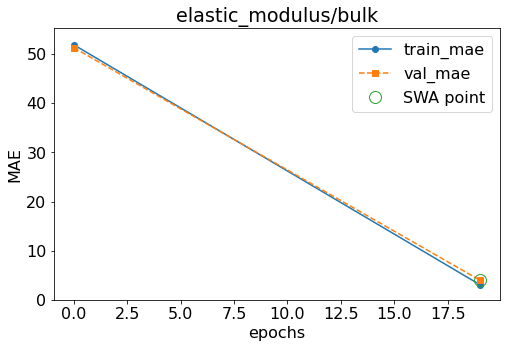

############################## 

x shape is torch.Size([128, 5]) 

x example: tensor([0.4977, 0.1259, 0.1314, 0.1209, 0.1241]) 

out shape is: torch.Size([128, 5, 256]) 

##############################
############################## 

x shape is torch.Size([128, 5]) 

x example: tensor([0.4977, 0.1259, 0.1314, 0.1209, 0.1241]) 

out shape is: torch.Size([128, 5, 256]) 

##############################
############################## 

x shape is torch.Size([128, 5]) 

x example: tensor([0.4919, 0.1238, 0.1265, 0.1292, 0.1286]) 

out shape is: torch.Size([128, 5, 256]) 

##############################
############################## 

x shape is torch.Size([128, 5]) 

x example: tensor([0.4919, 0.1238, 0.1265, 0.1292, 0.1286]) 

out shape is: torch.Size([128, 5, 256]) 

##############################
############################## 

x shape is torch.Size([128, 5]) 

x example: tensor([0.4941, 0.2563, 0.2496, 0.0000, 0.0000]) 

out shape is: torch.Size([128, 5, 256]) 

#####################

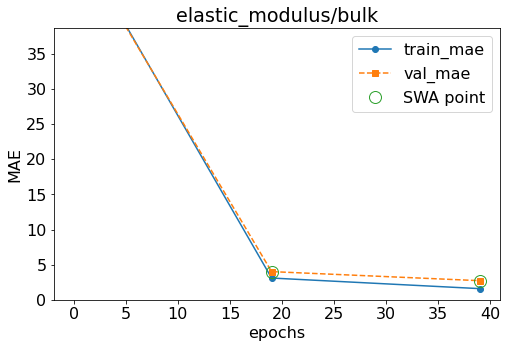

Saving network (elastic_modulus/bulk) to models/trained_models/elastic_modulus/bulk.pth


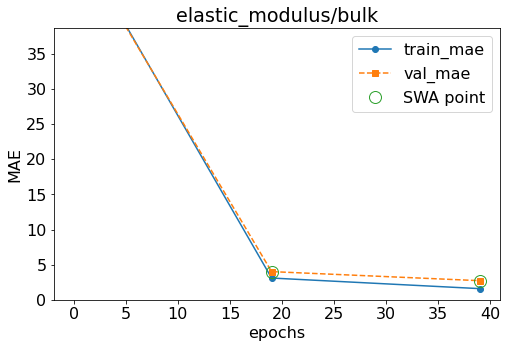

In [6]:
cb_bulk = tcb.get_model(data_dir='data/materials_data', mat_prop="elastic_modulus/bulk",transfer="elasticity0")

## 预测非等比

## 杨氏模量

In [14]:
df_young_pred = pd.read_csv('/home/zhaoxi/Data/df_young_125.csv',index_col = 0)

df_young_pred.rename(columns = {"young_modulus":"target"},inplace = True)

In [15]:
df_young_pred.to_csv('/home/zhaoxi/Software/CrabNet_Co/CoCoCrab-main/data/materials_data/elastic_modulus/young_pred.csv')

In [16]:
data_young = rf'data/materials_data/elastic_modulus/young_pred.csv'

In [17]:
cb_young.load_data(data_young, batch_size=2**9, train=False)

Generating EDM: 100%|██████████████████████████████████████████████████████| 123/123 [00:00<00:00, 143584.58formulae/s]


In [18]:
df_young_pred

,formula,target
0,Hf1 Zr2 Ta4 V1 C8,474.384
1,Hf1 Zr2 Ta4 Nb1 C8,476.092
2,Hf1 Zr2 Ta4 Ti1 C8,454.302
3,Hf1 Zr2 Ta4 Mo1 C8,490.162
4,Hf1 Zr2 Ta4 W1 C8,501.315
...,...,...
118,Ti2 Nb4 Mo1 W1 C8,531.087
119,Ti2 Nb4 Cr1 Mo1 C8,488.367
120,Ti2 Nb4 Cr1 W1 C8,497.787
121,Nb4 Cr1 Mo2 W1 C8,444.090


In [19]:
output_young = cb_young.predict(cb_young.data_loader)

src: tensor([[ 6., 73., 40., 72., 23.],
        [ 6., 73., 40., 72., 41.],
        [ 6., 73., 40., 72., 22.],
        [ 6., 73., 40., 72., 42.],
        [ 6., 73., 40., 72., 74.],
        [ 6., 73., 40., 72., 24.],
        [ 6., 73., 40., 41., 23.],
        [ 6., 73., 40., 22., 23.],
        [ 6., 73., 40., 23., 42.],
        [ 6., 73., 40., 23., 74.],
        [ 6., 73., 40., 23., 24.],
        [ 6., 73., 40., 22., 41.],
        [ 6., 73., 40., 41., 42.],
        [ 6., 73., 40., 41., 74.],
        [ 6., 73., 40., 41., 24.],
        [ 6., 73., 40., 22., 42.],
        [ 6., 73., 40., 22., 74.],
        [ 6., 73., 40., 22., 24.],
        [ 6., 73., 40., 42., 74.],
        [ 6., 73., 40., 24., 42.],
        [ 6., 73., 40., 24., 74.],
        [ 6., 73., 72., 41., 23.],
        [ 6., 73., 72., 22., 23.],
        [ 6., 73., 72., 23., 42.],
        [ 6., 73., 72., 23., 74.],
        [ 6., 73., 72., 23., 24.],
        [ 6., 73., 72., 22., 41.],
        [ 6., 73., 72., 41., 42.],
        [ 6., 7

In [20]:
df_young_pred = pd.DataFrame(
    {'calc': output_young[0], 'pred': output_young[1], 'formula': output_young[2],'uncert':output_young[3]})

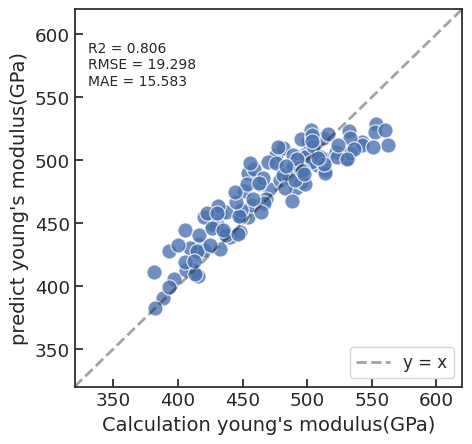

In [21]:
sns.set(style="ticks",font_scale=1.2)
plt.figure(figsize=(5,5),dpi=100)  ### 修改分辨率
axs = sns.scatterplot(data=df_young_pred, x= "calc", y="pred",s=120,marker='o',alpha = 0.8, color = 'b')



formatXy = 'y = x'
axs.plot((0, 1), (0, 1), transform=axs.transAxes, linewidth=2, ls='--',c='k',alpha=0.4, label = formatXy)

act = np.array(output_young[0])
pred = np.array(output_young[1])
    
r2 = r2_score(act, pred)
mae = mean_absolute_error(act, pred)
rmse = np.sqrt(mean_squared_error(act, pred))

str = 'R2 = %.3f \nRMSE = %.3f \nMAE = %.3f '%(r2, rmse, mae)

axs.set_xlim(320,620)
axs.set_ylim(320,620)

axs.legend(loc = 'lower right', fontsize = 12)
axs.text(330,560,str,fontsize = 10)

plt.tick_params(left='on',bottom='on',direction='in')
plt.xlabel("Calculation young's modulus(GPa)", fontdict={'size': 14})
plt.ylabel("predict young's modulus(GPa)", fontdict={'size': 14})

plt.savefig('/mnt/e/ZHAO/Data/ELASTIC_HEC/Figure/Young_hec.png', dpi = 600, bbox_inches = 'tight')   ### 保存图片

In [22]:
data = rf'data/materials_data/elastic_modulus/formulae_566370.csv'

In [23]:
cb_young.load_data(data, batch_size=2**9, train=False)

Generating EDM: 100%|█████████████████████████████████████████████████| 566370/566370 [00:07<00:00, 78024.39formulae/s]


In [24]:
output_young = cb_young.predict(cb_young.data_loader)

src: tensor([[ 6., 40., 23., 72., 73.],
        [ 6., 40., 73., 72., 23.],
        [ 6., 73., 23., 40., 72.],
        ...,
        [ 6., 72., 73., 40., 23.],
        [ 6., 23., 73., 40., 72.],
        [ 6., 72., 40., 23., 73.]])
frac: tensor([[0.5000, 0.2344, 0.1250, 0.0781, 0.0625],
        [0.5000, 0.3281, 0.1250, 0.0312, 0.0156],
        [0.5000, 0.2344, 0.1406, 0.0938, 0.0312],
        ...,
        [0.5000, 0.3594, 0.0625, 0.0625, 0.0156],
        [0.5000, 0.3594, 0.0625, 0.0625, 0.0156],
        [0.5000, 0.2031, 0.1406, 0.1094, 0.0469]])
############################## 

x shape is torch.Size([512, 5]) 

x example: tensor([0.5000, 0.2344, 0.1250, 0.0781, 0.0625]) 

out shape is: torch.Size([512, 5, 256]) 

##############################
############################## 

x shape is torch.Size([512, 5]) 

x example: tensor([0.5000, 0.2344, 0.1250, 0.0781, 0.0625]) 

out shape is: torch.Size([512, 5, 256]) 

##############################
src: tensor([[ 6., 40., 73., 72., 23.],
       

In [25]:
df_young_pred = pd.DataFrame(
    {'calc': output_young[0], 'pred': output_young[1], 'formula': output_young[2],'uncert':output_young[3]})

In [26]:
df_young_pred.to_csv("/home/zhaoxi/Data/young_pred_566370.csv")

In [27]:
df_young_pred.sort_values("pred",ascending =  False).head(10)

,calc,pred,formula,uncert
120335,0.0,537.395325,Ta24Hf3Nb2Ti3C32,58.294537
117832,0.0,537.188904,Ta24Hf3NbTi4C32,56.343437
117810,0.0,537.160400,Ta24Hf2NbTi5C32,62.165882
116920,0.0,537.146912,Ta24Hf2Nb3Ti3C32,56.245373
121340,0.0,537.079285,Ta24Hf4NbTi3C32,58.019077
162138,0.0,536.788452,Ta24V3Nb2Ti3C32,70.343048
117419,0.0,536.624084,Ta24Hf3Nb3Ti2C32,57.035946
119379,0.0,536.452515,Ta24Hf2Nb2Ti4C32,62.422863
162263,0.0,536.357666,Ta24V4NbTi3C32,63.303589
117135,0.0,536.323120,Ta24HfNb3Ti4C32,54.304779


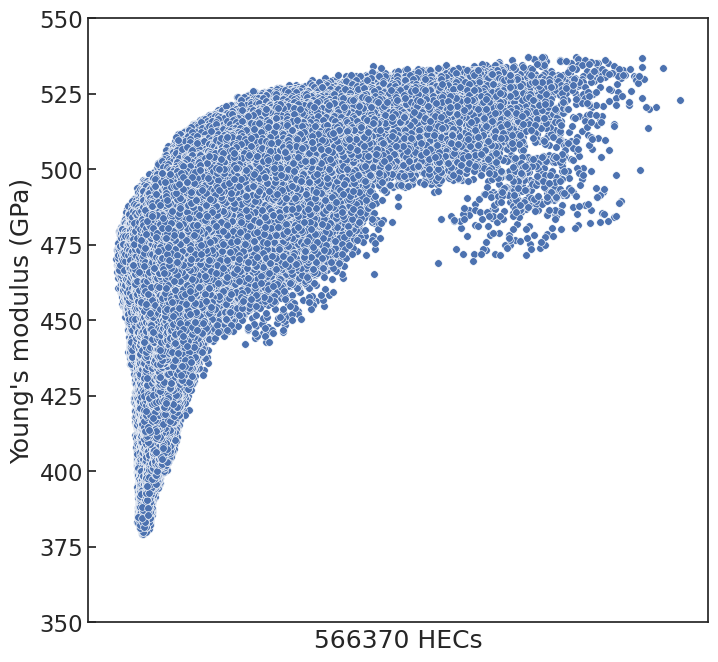

In [38]:
# 设置样式和字体大小
sns.set(style="ticks", font_scale=1.5)

# 设置画布大小和分辨率
plt.figure(figsize=(8, 8), dpi=100)

# 绘制散点图，并赋值给axs
axs = sns.scatterplot(data=df_young_pred, x="uncert", y="pred", s=30,color = 'b')

# 设置x轴和y轴的限制
#axs.set_xlim()
axs.set_ylim(350, 550)
axs.set_xticks([])

# 设置刻度参数
plt.tick_params(left='on', bottom='off', direction='in')

# 设置轴标签和字体大小
plt.xlabel(" 566370 HECs ", fontdict={'size': 18})
plt.ylabel("Young's modulus (GPa)", fontdict={'size': 18})

# 保存图表
plt.savefig('/mnt/e/ZHAO/Data/ELASTIC_HEC/Figure/566370_young.png', dpi = 600, bbox_inches = 'tight')   ### 保存图片